In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import csv
import re


MonthDict = {
    1: ["January", 31],
    2: ["February", 30],
    3: ["March", 31],
    4: ["April", 30],
    5: ["May", 31],
    6: ["June", 30],
    7: ["July", 31],
    8: ["August", 31],
    9: ["September", 30],
    10: ["October", 31],
    11: ["November", 30],
    12: ["December", 31]
}

In [2]:
class DayCounter:
    year = None
    month = None
    day = None

    def __init__(self, y, m, d):
        self.year, self.month, self.day = y, m, d

    def get_date_increment(self):
        max_months = 12
        max_days = MonthDict[self.month][1]
        d_hash = self.day % max_days
        if d_hash < self.day:
            nday = 1
            nmonth = self.month + 1
            nyear = self.year
            if nmonth == 13:
                nmonth = 1
                nyear = self.year + 1
        else:
            nday = self.day + 1
            nmonth = self.month
            nyear = self.year

        self.year, self.month, self.day = nyear, nmonth, nday
        return nyear, nmonth, nday

if __name__ == '__main__':
    y, m, d = 1995, 12, 30
    inpt = DayCounter(y=y, m=m, d=d)
    for i in range(400):
        print(inpt.get_date_increment())

(1995, 12, 31)
(1996, 1, 1)
(1996, 1, 2)
(1996, 1, 3)
(1996, 1, 4)
(1996, 1, 5)
(1996, 1, 6)
(1996, 1, 7)
(1996, 1, 8)
(1996, 1, 9)
(1996, 1, 10)
(1996, 1, 11)
(1996, 1, 12)
(1996, 1, 13)
(1996, 1, 14)
(1996, 1, 15)
(1996, 1, 16)
(1996, 1, 17)
(1996, 1, 18)
(1996, 1, 19)
(1996, 1, 20)
(1996, 1, 21)
(1996, 1, 22)
(1996, 1, 23)
(1996, 1, 24)
(1996, 1, 25)
(1996, 1, 26)
(1996, 1, 27)
(1996, 1, 28)
(1996, 1, 29)
(1996, 1, 30)
(1996, 1, 31)
(1996, 2, 1)
(1996, 2, 2)
(1996, 2, 3)
(1996, 2, 4)
(1996, 2, 5)
(1996, 2, 6)
(1996, 2, 7)
(1996, 2, 8)
(1996, 2, 9)
(1996, 2, 10)
(1996, 2, 11)
(1996, 2, 12)
(1996, 2, 13)
(1996, 2, 14)
(1996, 2, 15)
(1996, 2, 16)
(1996, 2, 17)
(1996, 2, 18)
(1996, 2, 19)
(1996, 2, 20)
(1996, 2, 21)
(1996, 2, 22)
(1996, 2, 23)
(1996, 2, 24)
(1996, 2, 25)
(1996, 2, 26)
(1996, 2, 27)
(1996, 2, 28)
(1996, 2, 29)
(1996, 2, 30)
(1996, 3, 1)
(1996, 3, 2)
(1996, 3, 3)
(1996, 3, 4)
(1996, 3, 5)
(1996, 3, 6)
(1996, 3, 7)
(1996, 3, 8)
(1996, 3, 9)
(1996, 3, 10)
(1996, 3, 11)
(199

## Die Input Klasse
Diese Klasse hat die Aufgabe, die Heizungsmessdaten aus der csv zu lesen.

In [3]:
class InPackage:
    def __init__(self, filename='feeds.csv', splitter='-|:|,|T'):
        self.filename = filename
        self.splitter = splitter

    def read_and_split(self):

        def in_to_dict(date, data, time_on):
            year, month, day = date
            if year not in data.keys():
                data[year] = dict()
                data[year]['t'] = 0.
            if month not in data[year].keys():
                data[year][month] = {'t': 0.}
            if day not in data[year][month].keys():
                data[year][month][day] = {'t': 0.}
            data[year][month][day][time] = time_on
            data[year]['t'] += time_on
            data[year][month]['t'] += time_on
            data[year][month][day]['t'] += time_on
            return data

        with open('feeds.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
            data = {}
            date_counter = None
            for _row in spamreader:
                try:
                    row = re.split(self.splitter, _row[0])
                    year = row[0]
                    month = int(row[1])
                    day = int(row[2])
                    time = ':'.join(row[3:6])[:-3]
                    counter = row[7]
                    time_on = float(row[8])
                    date = [year, month, day]

                    if date_counter is None:
                        date_counter = DayCounter(y=int(year), m=month, d=day)
                        next_date = [year, month, day]
                    else:
                        next_date = date_counter.get_date_increment()

                    while True:
                        if all(date[i] == date[i] for i in range(3)):
                            break
                        elif all(date[i] == next_date[i] for i in range(3)):
                            break
                        else:
                            next_date = date_counter.get_date_increment()
                            data = in_to_dict(next_date, data, time_on)
                            print(next_date)

                    data = in_to_dict(date, data, time_on)

                except:
                    pass
        return data

_in = InPackage()
_in.read_and_split()

{'2018': {'t': 82244.38470268199,
  12: {'t': 82244.38470268199,
   18: {'t': 4742.449208499,
    '13:13:41': 247.106091976,
    '13:42:51': 234.090065002,
    '14:09:26': 221.313879013,
    '14:37:05': 218.060045004,
    '15:03:57': 213.829797029,
    '15:56:44': 222.390021086,
    '16:50:11': 222.100035906,
    '17:15:19': 217.359992027,
    '17:42:25': 218.270206213,
    '18:07:56': 221.680118084,
    '18:33:40': 218.180075169,
    '18:59:23': 221.260026932,
    '19:23:44': 218.593462944,
    '19:50:32': 285.610056162,
    '20:03:49': 530.600049973,
    '20:13:55': 216.000038862,
    '20:44:32': 200.934986115,
    '21:38:39': 185.552608967,
    '22:38:37': 215.440034151,
    '23:25:21': 214.077617884},
   19: {'t': 6060.044380664,
    '00:06:27': 209.887772083,
    '00:47:32': 219.966001034,
    '01:29:06': 218.092278004,
    '02:10:15': 221.77019906,
    '02:48:06': 217.955410004,
    '04:49:00': 221.349138021,
    '06:29:16': 215.664026976,
    '07:18:14': 215.400017977,
    '08:3

## Klasse Öltank

In [4]:
import sympy as sp
import sympy.abc as abc

class Oeltank:
    # Dimensionen:
    lx = 3    # m
    ly = 1.5  # m
    lz = 0.

    def set_dh(self, h):
        self.lz = h

    def calc_v(self):
        return self.lx * self.ly * self.lz

    def get_v(self):
        return self.calc_v()

oel = Oeltank()
oel.set_dh(1.5)
print(oel.get_v())

6.75


# Beginn der Verarbeitung
## Einlesen der Messdaten
Seit 2018 werden die Einschaltzeiten der Heizung und der jeweilige Ölverbrauch aufgezeichnet. Das objekt datareader liest mit der Methode *read_and split* die Messpunkte aus einer .csv .

In [5]:
datareader = InPackage(filename='feeds.csv')
data = datareader.read_and_split()

## Jahresmenge

<IPython.core.display.Javascript object>


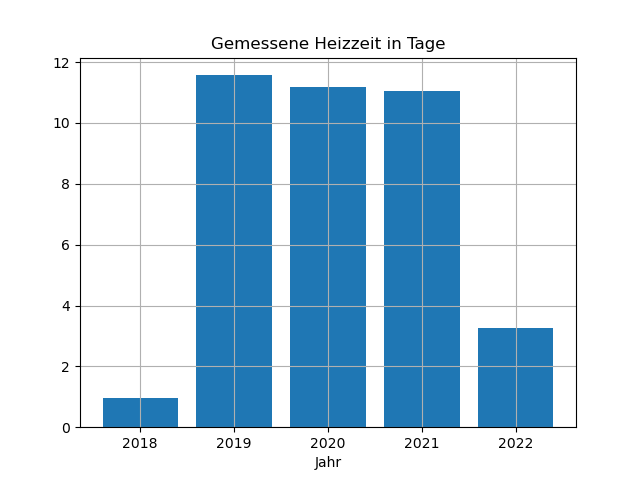

In [6]:
fig = plt.figure()
years = sorted(data.keys())
plt.bar(years, [data[year]['t']/3600/24 for year in years])
plt.title('Gemessene Heizzeit in Tage')
plt.grid()
plt.xlabel('Jahr')
plt.show()

# Leistung anhand der Maschinendaten
Hier wird die gemessene Zeit direkt mit der Brennerleistung multipliziert, um zur verbrauchten Energie zu kommen. Später wird die Messzeit statistisch abgeglichen. Dabei werden Ausfalltage einzelner jahre mit äuivalenten Messdaten anderer Jahre ersetzt.
Die so erhaltene wahre Zeit kann zu einer reevaluierung der Brennerleistung verwendet werden.

In [7]:
# Vergleich mit Kenndaten
Wirkungsgrad = 0.852
leistung = 70000  # WE
leistung = leistung / 860  # umrechnung in kW

print("Leistung aus Kenndaten: " + str(round(leistung, 1)) + "kW")
##################################################################################
# Vergleich mit Ölstand

Vol_Öl = 15 * 30 * (13.7 - 6.85)  # in l
Heitzwert = 10.9  # kWh/l
Energie_Öl = Vol_Öl * Heitzwert  # kWh
Energie_nutz = Energie_Öl * Wirkungsgrad # kWh/l


Leistung aus Kenndaten: 81.4kW


<IPython.core.display.Javascript object>


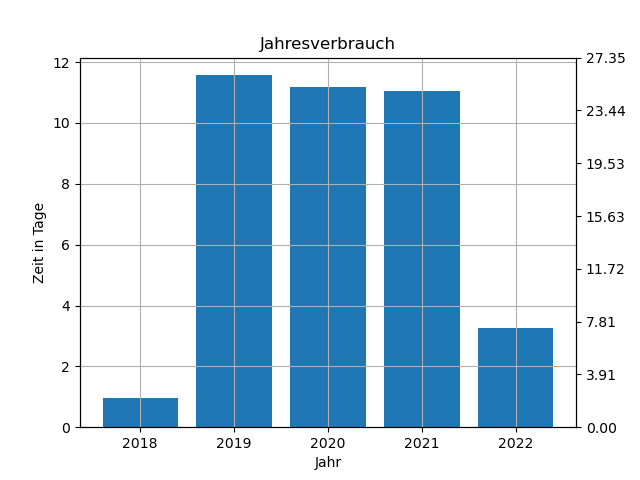

In [8]:
fig, ax1 = plt.subplots()
years = sorted(data.keys())
t_fac = 1/3600/24
ax1.bar(years, [data[year]['t']*t_fac for year in years])
e_fac = leistung/3600/1000/t_fac
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Zeit in Tage')
mn, mx = ax1.get_ylim()
ax2 = ax1.twinx()
ax2.set_ylim(mn*e_fac, mx*e_fac)
ax2.set_yticks(np.linspace(ax1.get_yticks()[0]*e_fac,ax1.get_yticks()[-1]*e_fac,len(ax1.get_yticks())))
plt.title('Jahresverbrauch')
ax1.grid()
plt.show()

## Monatsmenge

<IPython.core.display.Javascript object>


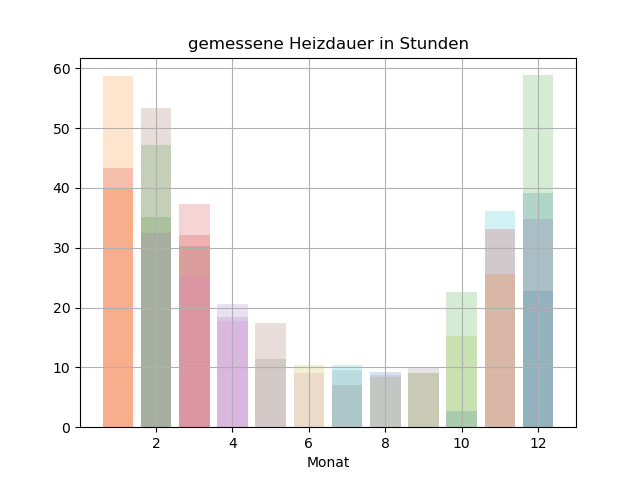

In [9]:
year_month_matrix = sp.zeros(len(years), 12)
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        m_time = data[year][month]['t']/3600
        year_month_matrix[i-1, j-1] = m_time
        plt.bar(month, m_time, alpha=0.2)
plt.title('gemessene Heizdauer in Stunden')
plt.xlabel('Monat')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


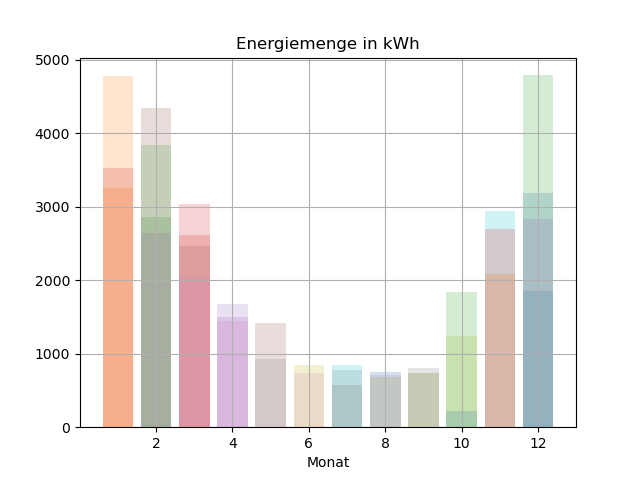

In [10]:
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        m_time = leistung * data[year][month]['t']/3600
        plt.bar(month, m_time, alpha=0.2)
plt.title('Energiemenge in kWh')
plt.xlabel('Monat')
plt.grid()
plt.show()

## Tagesmenge

<IPython.core.display.Javascript object>


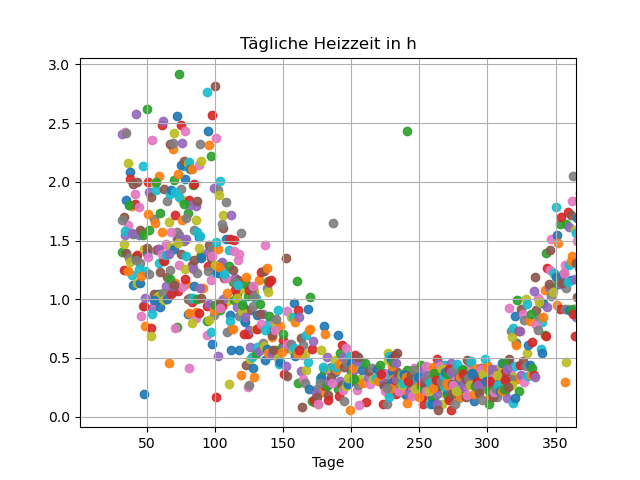

In [11]:
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        for day in data[year][month].keys():
            if day == 't':
                continue
            m_time = data[year][month][day]['t']/3600
            plt.scatter(x=month*31+day, y=m_time, alpha=0.9)
plt.title('Tägliche Heizzeit in h')
plt.xlabel('Tage')
plt.xlim((1, 365))
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


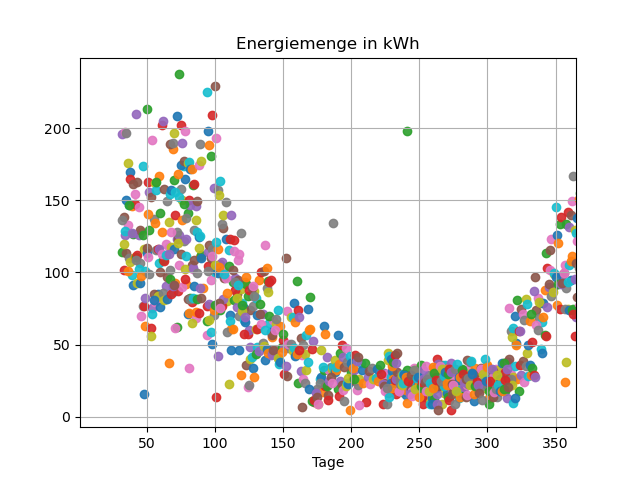

In [12]:
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        for day in data[year][month].keys():
            if day == 't':
                continue
            m_time = leistung * data[year][month][day]['t']/3600
            plt.scatter(x=month*31+day, y=m_time, alpha=0.9)

plt.title('Energiemenge in kWh')
plt.xlabel('Tage')
plt.xlim((1, 365))
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


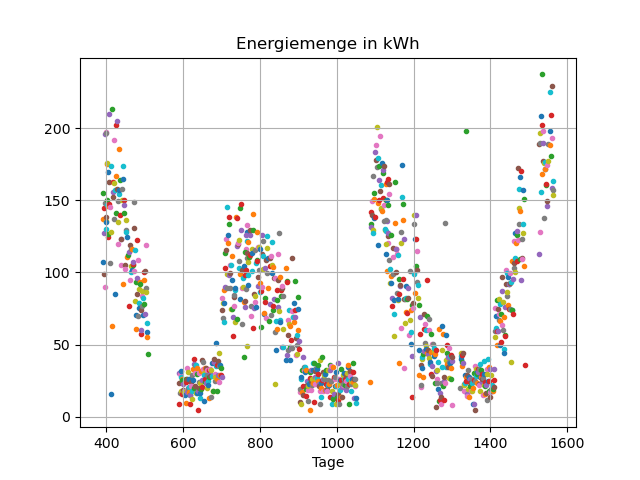

In [13]:
fig = plt.figure()
for i, year in enumerate(years):
    for j, month in enumerate(data[year].keys()):
        if month == 't':
            continue
        for day in data[year][month].keys():
            if day == 't':
                continue
            m_time = leistung * data[year][month][day]['t']/3600
            plt.scatter(x=365*i+month*31+day, y=m_time, marker='.')

plt.title('Energiemenge in kWh')
plt.xlabel('Tage')
plt.grid()
plt.show()

In [14]:
import os

os.system('jupyter nbconvert --to html yourNotebook.ipynb')

-1